<b>Concepts Used:</b>
Web Scraping, Text Mining, VADER (Sentiment Analysis)

<h2><center>Political Analysis: What does the media say about the Opposition?</center></h2>

#### Problem Description (Hypothetical):

Indian opposition parties lack a tool to quickly collect and gauge the negative sentiment-specific statements  published in online media to understand public reactions to key topics and adjust their messaging accordingly. The sheer volume of published articles daily, makes it impossible for Indian opposition parties to manually comb through them for valuable insights. It may further result in limited understanding of public sentiment, hindering their ability to strategize effectively. 


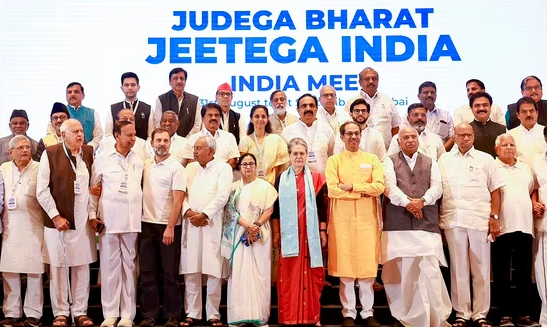

<b>Business Objective:</b> 
As a web-analytics firm, develop a MVP(minimum-valiable product) to perform sentiment analysis of online articles

<b>Business Constraints:</b>
Identifying online articles to be analyzed

<b>Data Description</b>
<ul>
<li>Unstructured text data</li>
<li>Web scraping of articles from renowned media houses</li>
</ul>


<b>Minimum Viable Product Features</b>
<ul>
<li>Extract the statements with negative sentiment</li>
<li>Rate the statements based on their polarity</li>
</ul>

In [295]:
#importing relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import newspaper
from newspaper import Article
from nltk.tokenize import sent_tokenize

In [296]:
#Article urls related to the subject

url1 = 'https://www.thequint.com/opinion/nitish-mamata-aap-congress-india-block-strength-weakness-bjp-rjd'
url2 = 'https://www.thequint.com/news/politics/nitish-kumar-india-bloc-narendra-modi-nda-2024-elections-caste-census'
url3 = 'https://www.aljazeera.com/features/2024/1/29/cracks-in-indias-opposition-alliance-against-pm-modi-ahead-of-elections'
url4 = 'https://indianexpress.com/article/political-pulse/india-alliance-congress-tmc-west-bengal-ucc-pm-modi-9141700/'
url5 = 'https://indianexpress.com/article/political-pulse/india-alliance-up-worry-rld-unhappy-seat-uncertainty-9143595/'
url6 = 'https://www.bbc.com/news/world-asia-india-68125968'
url7 = 'https://thewire.in/politics/the-india-alliance-must-forge-ahead-leaving-nitish-kumar-behind'
url8 = 'https://www.rediff.com/news/report/india-alliance-is-only-for-lok-sabha-polls-not-states-congress/20240202.htm'
url9 = 'https://www.livemint.com/politics/will-contest-with-india-alliance-for-lok-sabha-elections-2024-but-arvind-kejriwal-on-seat-sharing-11706489009182.html'
url10 = 'https://www.telegraphindia.com/india/india-alliance-for-lok-sabha-elections-not-for-assembly-polls-in-states-congress-general-secretary-jairam-ramesh/cid/1997933'


In [297]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


def sentiment(url):
    sentiment = SentimentIntensityAnalyzer() 
    art = Article(url, lang = 'en')
    art.download()
    art.parse()
    scores_df = pd.DataFrame()
    
    for sent in sent_tokenize(art.text):
        score_dict = sentiment.polarity_scores(sent)
        value = pd.DataFrame(data = score_dict.values(), index = score_dict.keys()).transpose()
        scores_df = pd.concat([scores_df, value])
    
    no_of_tokens = len(sent_tokenize(art.text))    
    scores_df.index = np.arange(0, no_of_tokens)
    
    neg_scores_df = scores_df[(scores_df.compound < 0)]
    
    neg_sent_idx = list(neg_scores_df.index)
    neg_sent = []
    
    for i in neg_sent_idx:
        neg_sent.append(sent_tokenize(art.text)[i])
    
    
    return(art.title, neg_scores_df, neg_sent)


In [285]:
#Article 1:
sentiment(url1)

('The Congress is INDIA Bloc’s Greatest Strength but Also Its Biggest Weakness',
     neg   neu  pos  compound
 2  0.34  0.66  0.0   -0.9313,
 ['But as in the earlier case, ego clashes, state-level political rivalries, turf wars, and an unstated battle over leadership roles are threatening to unravel the six-month-old opposition alliance.'])

In [286]:
#Article 2:
sentiment(url2)

('Nitish Kumar Re-Joins NDA: 4 Big Reasons Why This Will Harm INDIA Bloc',
     neg   neu  pos  compound
 1  0.07  0.93  0.0   -0.1695,
 ['INDIA bloc chairman and Congress president Mallikarjun Kharge said that they "expected that Nitish would switch" and that his decision hasn\'t surprised them.'])

In [287]:
#Article 3:
sentiment(url3)

('Cracks in Indian opposition alliance against PM Modi ahead of elections',
       neg    neu    pos  compound
 3   0.126  0.752  0.121   -0.0387
 4   0.095  0.905  0.000   -0.2500
 15  0.134  0.779  0.087   -0.2960
 20  0.149  0.851  0.000   -0.8338
 25  0.130  0.870  0.000   -0.2023
 45  0.081  0.919  0.000   -0.3182
 50  0.143  0.857  0.000   -0.5423
 53  0.256  0.744  0.000   -0.3412
 67  0.216  0.784  0.000   -0.2960,
 ['But on Sunday, he broke away and instead joined hands with the National Democratic Alliance (NDA), a coalition of parties led by the BJP.',
  'He resigned as chief minister, then was sworn in again, this time with his new partners — all within hours.',
  '“The charges all the regional parties are making is that Congress is trying to put a lot of pressure on them and demanding a larger number of seats than they should get,” Sanjay Kumar, political analyst and psephologist, told Al Jazeera.',
  '“It’s not just us but all constituents of the alliance were uncomfortab

In [288]:
#Article 4:
sentiment(url4)

('Today in Politics: For INDIA alliance, Bengal troubles deepen but can Congress and TMC patch up?',
      neg    neu    pos  compound
 1  0.213  0.787  0.000   -0.4019
 2  0.134  0.810  0.056   -0.5043
 4  0.222  0.778  0.000   -0.5719
 7  0.086  0.831  0.083   -0.0276,
 ['And the alliance’s problems in Bengal only seem to be mounting.',
  'West Bengal Chief Minister Mamata Banerjee who has said in the past that the Trinamool Congress (TMC) contest the elections alone and accused the Congress, Left, and BJP of being part of a nexus has stepped up the attacks by claiming that she was not sure if the Congress would win even 40 Lok Sabha seats in the coming elections.',
  'But the Congress’s ally and the TMC’s bitter rival CPI(M) is against any understanding.',
  'And more importantly, how will the INDIA grouping recover when all odds seem to be against it in Bengal, which the BJP has identified as a key battleground?'])

In [289]:
#Article 5:
sentiment(url5)

('New worry for INDIA alliance in UP: Some in RLD unhappy about seat uncertainty',
       neg    neu    pos  compound
 3   0.064  0.936  0.000   -0.3412
 4   0.098  0.902  0.000   -0.4404
 7   0.131  0.869  0.000   -0.2755
 8   0.094  0.906  0.000   -0.2411
 16  0.124  0.806  0.071   -0.5719,
 ['“Despite what happens between the Congress and the SP, we will continue our alliance with the SP as going with the Congress, which lacks a voter base in the state, will not be beneficial for us.',
  'Jayant ji and Akhilesh ji have refused to release which seats the RLD will get and this has resulted in some anxiety among leaders who are preparing to contest on the RLD symbol,” said a senior RLD leader.',
  'But for seats such as Meerut, Muzaffarnagar, Nagina, Agra and Hathras, there is no certainty.',
  'Hence, the candidates there are not sure about whether to keep their options open or not,” said the RLD functionary.',
  'Also in Political Pulse | Behind Mamata attack on Congress, fear of spl

In [290]:
#Article 6:
sentiment(url6)

("India's opposition challenge to Modi may be imploding",
      neg    neu  pos  compound
 3  0.145  0.855  0.0    -0.296,
 ['And it should defer to the regional partners in the rest of the states".'])

In [291]:
#Article 7:
sentiment(url7)

('The INDIA Alliance Must Forge Ahead, Leaving Nitish Kumar Behind',
       neg    neu    pos  compound
 0   0.189  0.811  0.000   -0.2732
 3   0.118  0.833  0.049   -0.5849
 4   0.082  0.847  0.071   -0.1027
 9   0.143  0.779  0.078   -0.3818
 12  0.106  0.822  0.072   -0.2500,
 ['Yet another episode of unscrupulous trickery has materialised in Bihar.',
  'The corollary to the new Nitish-antic is that the media, by and large, feels less reviled by this unprincipled shift and is more outraged by the greediness of the Congress in not having risen in time to Nitish Kumar’s selflessly Herculean determination to oust the ruling right-wing from power.',
  'You see, if the corporate-chummy “nationalist” ruling party is to be kept in the saddle, the media must never cease to find the Congress in the wrong, whatever journalistic calisthenics the job may entail.',
  'Mallikarjun Kharge’s elevation, by common consent, as “chairperson” of the INDIA alliance brought bad news to Nishit Kumar in tha

In [292]:
#Article 8:
sentiment(url8)

('INDIA alliance is only for Lok Sabha polls, not states: Congress',
       neg    neu    pos  compound
 5   0.134  0.866  0.000   -0.5423
 8   0.130  0.870  0.000   -0.4588
 9   0.203  0.696  0.101   -0.4939
 13  0.053  0.900  0.047   -0.0772,
 ['Ramesh said that though in Maharashtra, the assembly polls will be fought together by Congress, NCP and Shiv Sena, in other state elections there will be no alliance of INDIA partners.',
  'The Congress general secretary said that the INDIA alliance has been made to defeat the ideology of the BJP and RSS.',
  "Claiming that the country's Constitution and democracy are under threat, he said that it is necessary to defeat the BJP in order to save them.",
  '"We look at it as a battle of ideologies," he said, claiming that the yatra, which started from ethnic strife-torn Manipur and is scheduled to end in Maharashtra on March 20 after traversing several states, was receiving huge response from people of all walks of life.'])

In [293]:
#Article 9:
sentiment(url9)

('‘Will contest with INDIA alliance for Lok Sabha elections 2024, but…’: Arvind Kejriwal on seat sharing',
       neg    neu    pos  compound
 2   0.070  0.930  0.000   -0.3612
 8   0.230  0.556  0.214   -0.0516
 15  0.075  0.925  0.000   -0.2960,
 ['"For the upcoming Lok Sabha elections we will contest elections together with the INDIA alliance but for the assembly elections, we will contest alone on all 90 seats of Haryana by itself," Kejriwal said.',
  '"People have been disillusioned with every party in Haryana.',
  'Meanwhile, Punjab Chief Minister and AAP leader Bhagwant Mann had earlier said there will be no alliance with Congress for the upcoming Lok Sabha elections in the state.'])

In [294]:
#Article 10:
sentiment(url10)

('INDIA alliance for Lok Sabha elections, not for assembly polls in states: Jairam Ramesh',
       neg    neu    pos  compound
 4   0.134  0.866  0.000   -0.5423
 7   0.130  0.870  0.000   -0.4588
 8   0.203  0.696  0.101   -0.4939
 12  0.053  0.900  0.047   -0.0772,
 ['Ramesh said that though in Maharashtra, the assembly polls will be fought together by Congress, NCP and Shiv Sena, in other state elections there will be no alliance of INDIA partners.',
  'The Congress general secretary said that the INDIA alliance has been made to defeat the ideology of the BJP and RSS.',
  "Claiming that the country's constitution and democracy are under threat, he said that it is necessary to defeat the BJP in order to save them.",
  '"We look at it as a battle of ideologies," he said, claiming that the Yatra, which started from ethnic strife-torn Manipur and is scheduled to end in Maharashtra on March 20 after traversing several states, was receiving huge response from people of all walks of life.'